<a href="https://colab.research.google.com/github/TeddyMuli/first_ml_project/blob/main/first_ml_project_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X: 
      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
0     2.59540  167.850                0.0            0.000000
1     2.37650  133.405                0.0            0.000000
2     2.59380  167.850                1.0            0.000000
3     2.02890  133.405                1.0            0.000000
4     2.91890  187.375                1.0            0.000000
...       ...      ...                ...                 ...
1139  1.98820  287.343                8.0            0.000000
1140  3.42130  286.114                2.0            0.333333
1141  3.60960  308.333                4.0            0.695652
1142  2.56214  354.815                3.0            0.521739
1143  2.02164  179.219                1.0            0.461538

[1144 rows x 4 columns]
X Train: 
     MolLogP    MolWt  NumRotatableBonds  AromaticProportion
107  3.14280  112.216                5.0            0.000000
378 -2.07850  142.070                0.0            0.000000
529 -0.47730  168.152             

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


              Method Training MSE Training R2  Test MSE   Test R2
0  Linear Regression       2.3971    0.439718  2.899494  0.401071
Deep Neural Network (RF equivalent)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                Method Training MSE Training R2  Test MSE   Test R2
0  Deep Neural Network     0.914983    0.786138  0.950117  0.803741
                Method Training MSE Training R2  Test MSE   Test R2
0    Linear Regression       2.3971    0.439718  2.899494  0.401071
1  Deep Neural Network     0.914983    0.786138  0.950117  0.803741


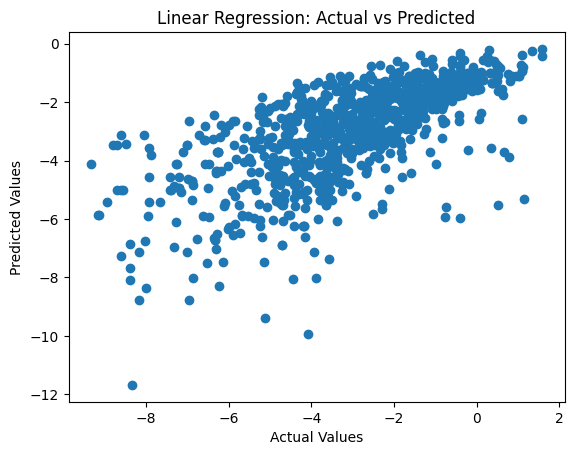

In [1]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

'''Data Preparation'''
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
# Separate x and y
y = df['logS']
x = df.drop('logS', axis=1)
print(f'X: \n{x}')

# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
print(f'X Train: \n{x_train}')
print(f'X Test: \n{x_test}')

'''Model building'''
'''Linear Regression with TensorFlow'''
print('Linear Regression')

# Create Linear Regression model using Keras
lr_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(x_train.shape[1],), use_bias=True)
])

# Compile the model
lr_model.compile(optimizer='adam', loss='mse')

# Train the model
lr_history = lr_model.fit(x_train, y_train, epochs=100, verbose=0)

# Make predictions
y_lr_train_prediction = lr_model.predict(x_train, verbose=0)
y_lr_test_prediction = lr_model.predict(x_test, verbose=0)

# Evaluate model performance
lr_train_mse = mean_squared_error(y_train, y_lr_train_prediction)
lr_train_r2 = r2_score(y_train, y_lr_train_prediction)
lr_test_mse = mean_squared_error(y_test, y_lr_test_prediction)
lr_test_r2 = r2_score(y_test, y_lr_test_prediction)

lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
print(lr_results)

'''Random Forest equivalent using Deep Neural Network'''
print('Deep Neural Network (RF equivalent)')

# Create a deeper model to mimic Random Forest behavior
rf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
rf_model.compile(optimizer='adam', loss='mse')

# Train the model
rf_history = rf_model.fit(x_train, y_train, epochs=100, verbose=0)

# Make predictions
y_rf_train_prediction = rf_model.predict(x_train, verbose=0)
y_rf_test_prediction = rf_model.predict(x_test, verbose=0)

# Evaluate model performance
rf_train_mse = mean_squared_error(y_train, y_rf_train_prediction)
rf_train_r2 = r2_score(y_train, y_rf_train_prediction)
rf_test_mse = mean_squared_error(y_test, y_rf_test_prediction)
rf_test_r2 = r2_score(y_test, y_rf_test_prediction)

rf_results = pd.DataFrame(['Deep Neural Network', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
print(rf_results)

'''Model Comparison'''
df_models = pd.concat([lr_results, rf_results], axis=0)
print(df_models.reset_index(drop=True))

'''Data Visualization'''
plt.scatter(x=y_train, y=y_lr_train_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()